**Dataset:** [Rush Kirubi, Kaggle](https://www.kaggle.com/datasets/rush4ratio/video-game-sales-with-ratings)

### Imports

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [73]:
# Global variables
year_range = "2010-2016"

## Data preparation

### Reading data

In [61]:
data = pd.read_csv('../datasets/sales_rush_kirubi.csv')
print(data.count())
data.head()

Name               16717
Platform           16719
Year_of_Release    16450
Genre              16717
Publisher          16665
NA_Sales           16719
EU_Sales           16719
JP_Sales           16719
Other_Sales        16719
Global_Sales       16719
Critic_Score        8137
Critic_Count        8137
User_Score         10015
User_Count          7590
Developer          10096
Rating              9950
dtype: int64


,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


### Cleaning data

In [62]:
data_clean = data[data['Critic_Count'].notna()]
data_clean = data_clean[data_clean['User_Score'].notna()]
data_clean = data_clean[data_clean['User_Score'] != 'tbd']
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Developer'].notna()]
data_clean = data_clean[data_clean['Rating'].notna()]
data_clean = data_clean[data_clean['Publisher'].notna()]
data_clean = data_clean[data_clean['Year_of_Release'].notna()]
data_clean.count()

Name               6825
Platform           6825
Year_of_Release    6825
Genre              6825
Publisher          6825
NA_Sales           6825
EU_Sales           6825
JP_Sales           6825
Other_Sales        6825
Global_Sales       6825
Critic_Score       6825
Critic_Count       6825
User_Score         6825
User_Count         6825
Developer          6825
Rating             6825
dtype: int64

In [63]:
# filtering to the period of 2010 to 2016
print(data_clean['Year_of_Release'].describe())
data_clean = data_clean[data_clean['Year_of_Release'] >= 2010]
data_clean.describe()

count    6825.000000
mean     2007.436777
std         4.211248
min      1985.000000
25%      2004.000000
50%      2007.000000
75%      2011.000000
max      2016.000000
Name: Year_of_Release, dtype: float64


,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Count
count,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000,2137.000000
mean,2012.440805,0.393280,0.295073,0.058479,0.094871,0.841788,71.216659,33.200281,359.293870
std,1.973936,0.849488,0.628733,0.202921,0.207301,1.645649,13.402210,22.752004,871.933007
min,2010.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,4.000000
25%,2011.000000,0.050000,0.030000,0.000000,0.010000,0.130000,64.000000,14.000000,26.000000
50%,2012.000000,0.140000,0.100000,0.000000,0.030000,0.320000,74.000000,28.000000,79.000000
75%,2014.000000,0.390000,0.290000,0.040000,0.090000,0.870000,81.000000,48.000000,289.000000
max,2016.000000,15.000000,9.090000,4.390000,3.960000,21.810000,97.000000,113.000000,10665.000000


## Genre analysis

### Count by genre

In [71]:
data_count_by_genre = data_clean.groupby('Genre')['Name'].count()
data_count_by_genre = data_count_by_genre[data_count_by_genre.index != 'Misc']
data_count_by_genre = data_count_by_genre.sort_values(ascending=False)
data_count_by_genre

Genre
Action          661
Shooter         291
Role-Playing    250
Sports          237
Racing          135
Fighting        120
Platform         94
Adventure        77
Simulation       68
Strategy         60
Puzzle           20
Name: Name, dtype: int64

/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_36594/1107927720.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(data_count_by_genre.index, rotation=45)
/var/folders/hk/vc7_d06j5yq99t_fqllsqsxc0000gn/T/ipykernel_36594/1107927720.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


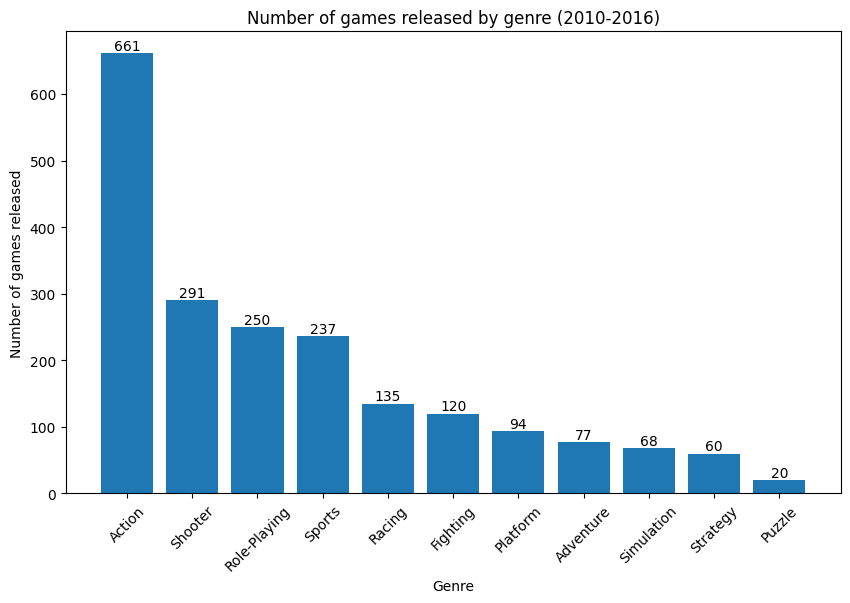

In [74]:
fig, ax = plt.subplots(figsize=(10, 6))
bar_container = ax.bar(data_count_by_genre.index, data_count_by_genre)
ax.set(xlabel='Genre', ylabel='Number of games released')
ax.set(title=f'Number of games released by genre ({year_range})')
ax.set_xticklabels(data_count_by_genre.index, rotation=45)
ax.bar_label(bar_container)
fig.show()

### Sales by genre

Chosen genres:
* Action
* Shooter
* Role-playing
* Sport

In [81]:
chosen_genres = ['Shooter', 'Role-Playing', 'Sports']

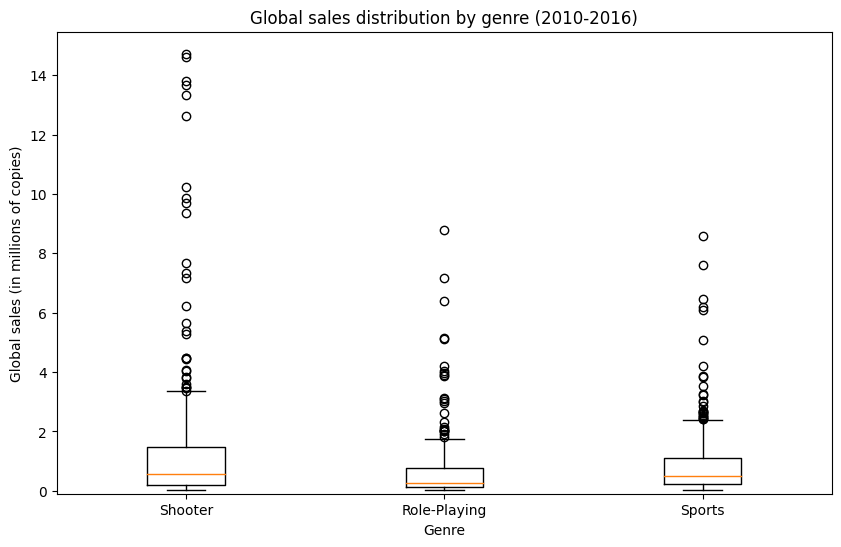

In [83]:
plt.figure(figsize=(10, 6))
plt.boxplot([data_clean[data_clean['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()

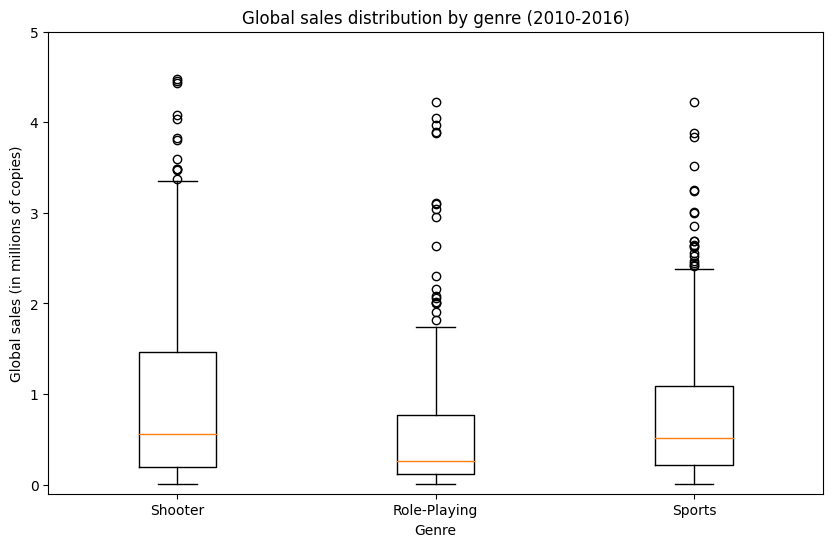

In [84]:
# scoped chart
plt.figure(figsize=(10, 6))
plt.boxplot([data_clean[data_clean['Genre'] == genre]['Global_Sales'] for genre in chosen_genres],
            labels=chosen_genres)
plt.xlabel('Genre')
plt.ylabel('Global sales (in millions of copies)')
plt.ylim(bottom=-0.1, top=5)
plt.title(f'Global sales distribution by genre ({year_range})')
plt.show()